In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import io

In [24]:
dataset=pd.read_csv("x_final_csv.csv")

In [25]:
dataset

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,100,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,100,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,100,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,100,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,100,Crater wear


In [26]:
x=dataset.iloc[:,0:12].values
y=dataset.iloc[:,12].values

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [28]:
print(np.unique(y))
print(np.unique(y).sum())

['Crater wear' 'Flank Wear' 'Good' 'Nose Wear' 'Notch wear'
 'Tool breakage ']
Crater wearFlank WearGoodNose WearNotch wearTool breakage 


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y1=encoder.fit_transform(y)


In [30]:
print(y1.shape)
print(x.shape)

(300,)
(300, 12)


In [31]:
x.shape[1]

12

In [32]:
sample_size=x.shape[0]
time_steps=x.shape[1]
input_dimension=1
x_reshaped=x.reshape(sample_size,time_steps,input_dimension)

print("After reshape:\n",x_reshaped.shape)
print(x_reshaped.shape[0])
print(x_reshaped.shape[1])
print(x_reshaped.shape[2])
print("Sample shape:\n",x_reshaped[0].shape)
print("An example sample :\n",x_reshaped[0])

After reshape:
 (300, 12, 1)
300
12
1
Sample shape:
 (12, 1)
An example sample :
 [[-0.86939937]
 [ 1.40880986]
 [ 1.38417949]
 [-0.866907  ]
 [-0.45678934]
 [-0.39817647]
 [ 0.03912756]
 [-0.88567023]
 [ 1.25685037]
 [ 1.27250082]
 [ 1.29450258]
 [ 0.05783149]]


In [35]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=False,random_state=None)

i=1
for train_index,test_index in kf.split(x_reshaped,y1):
    print("fold",i)
    x_train,x_test=x_reshaped[train_index],x_reshaped[test_index]
    y_train,y_test=y1[train_index],y1[test_index]
    print(x_train,"having:",len(x_train))
    print(x_test,"having:",len(x_test))
    print("--------------------------")
    i+=1

fold 1
[[[ -0.41412406]
  [  0.56211278]
  [  0.53269112]
  ...
  [  0.04123755]
  [  0.50915787]
  [  0.05783149]]

 [[  1.52368499]
  [ -0.84904901]
  [  0.39645298]
  ...
  [  0.27576389]
  [ -0.59737909]
  [  0.05783149]]

 [[  0.71675509]
  [ -0.7608514 ]
  [ -1.10216654]
  ...
  [  0.56892181]
  [ -0.59925193]
  [  0.05783149]]

 ...

 [[  0.12883512]
  [ -0.30222382]
  [ -0.31879724]
  ...
  [ -0.31055196]
  [ -0.21500736]
  [  0.05783149]]

 [[  0.96665167]
  [  0.68558944]
  [  0.70298879]
  ...
  [  0.62755339]
  [  0.29284472]
  [  0.05783149]]

 [[ -0.0473281 ]
  [  0.79142657]
  [  0.77110786]
  ...
  [  0.68618498]
  [ -8.36186624]
  [-17.29161647]]] having: 200
[[[-0.86939937]
  [ 1.40880986]
  [ 1.38417949]
  ...
  [ 1.27250082]
  [ 1.29450258]
  [ 0.05783149]]

 [[-0.88603225]
  [ 1.51464699]
  [ 1.45229855]
  ...
  [ 1.44839558]
  [ 1.39220246]
  [ 0.05783149]]

 [[-0.91483258]
  [ 1.62048413]
  [ 1.55447716]
  ...
  [ 1.56565875]
  [ 1.47429533]
  [ 0.05783149]]

 ..

In [36]:
print(np.unique(y1))
print(np.unique(y1).sum())

[0 1 2 3 4 5]
15


In [37]:
y1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
x_train.shape[0]

200

In [39]:
x_train.shape[1]

12

In [40]:
y1.shape

(300,)

In [41]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential()

model.add(keras.layers.Conv1D(filters=64, kernel_size=2, strides=1,padding="valid",activation='relu',use_bias=True,
    kernel_initializer="glorot_uniform", input_shape=(12,1)))
 
model.add(keras.layers.Conv1D(filters=32, kernel_size=2, strides=1,padding="valid",activation='relu',use_bias=True,
    kernel_initializer="glorot_uniform", input_shape=(12,1)))
    

model.add(keras.layers.MaxPooling1D(2,1))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(6,activation='softmax'))

In [42]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [53]:
model_history=model.fit(x_train, y_train,validation_split=.33,batch_size=10, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0797 - accuracy: 0.9701 - val_loss: 26.1049 - val_accuracy: 0.2424
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0882 - accuracy: 0.9627 - val_loss: 26.0383 - val_accuracy: 0.2424
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.97 - 0s 13ms/step - loss: 0.1177 - accuracy: 0.9701 - val_loss: 25.8607 - val_accuracy: 0.2424
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9627 - val_loss: 25.6569 - val_accuracy: 0.2424
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0680 - accuracy: 0.9701 - val_loss: 25.5615 - val_accuracy: 0.2424
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0699 - accuracy: 0.9701 - val_loss: 25.5992 - val_accuracy: 0.2424
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0608 - accuracy: 0.9776 

Epoch 58/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0744 - accuracy: 0.9776 - val_loss: 25.9052 - val_accuracy: 0.2424
Epoch 59/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0964 - accuracy: 0.9627 - val_loss: 25.9026 - val_accuracy: 0.2424
Epoch 60/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0592 - accuracy: 0.9776 - val_loss: 26.0153 - val_accuracy: 0.2424
Epoch 61/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0592 - accuracy: 0.9776 - val_loss: 26.1770 - val_accuracy: 0.2424
Epoch 62/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0567 - accuracy: 0.9851 - val_loss: 26.3549 - val_accuracy: 0.2424
Epoch 63/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0678 - accuracy: 0.9776 - val_loss: 26.3148 - val_accuracy: 0.2424
Epoch 64/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0579 - accuracy: 0.9851 - val_loss: 26.3207 - val_accuracy:

In [57]:
np.pred=model.predict(x_test)
y_pred=np.pred.argmax(axis=-1)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00      50.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



Text(69.0, 0.5, 'Truth')

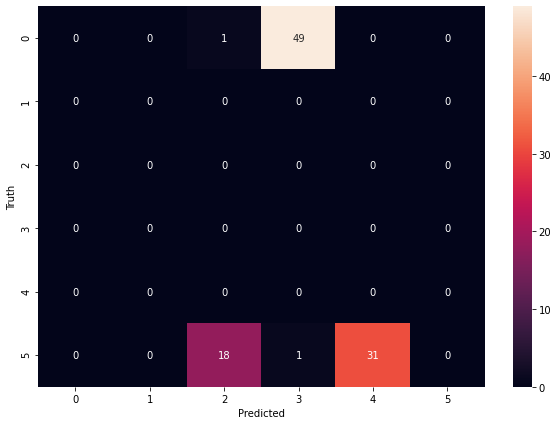

In [60]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
#Accuracy
acc=(12+11+10+14+13+19)/(14+15+13+15+14+20)
acc

0.8681318681318682

In [296]:
round(acc,2)

0.88